In [1]:

import matplotlib.pyplot as plt
import numpy as np

### 1. 예제 생성하기
np.random.seed(9)
xpoints = np.arange(10)
ypoints = [np.arange(10),
           np.arange(10)**2,
           np.random.choice(100, size=10)]

### 2. 선 옵션 설정하기
styles = ['-', '--', ':']
colors = ['deepskyblue', 'mediumseagreen', 'hotpink']
widths = [10, 5, 2]

### 3. 선 그래프 그리기
plt.figure(figsize=(3,4))     # 그래프 크기(단위 inch)
for i in range(len(ypoints)):
    plt.plot(xpoints, ypoints[i],
             linestyle=styles[i],   # 선 모양
             color=colors[i],       # 선 색상
             linewidth=widths[i])   # 선 굵기

### 4. 그래프 옵션 설정하기
plt.title("Line examples")    # 그래프 제목
plt.xlabel("X")               # x축 이름
plt.ylabel("Y")               # y축 이름
plt.xlim([0,10])              # x축 최소최대값
plt.ylim([0,100])             # y축 최소최대값

### 5. 그래프 그림 저장하기
plt.savefig("lineexamples.png", dpi=350)

### 6. 그래프 화면에 출력하기
plt.show()

<Figure size 300x400 with 1 Axes>

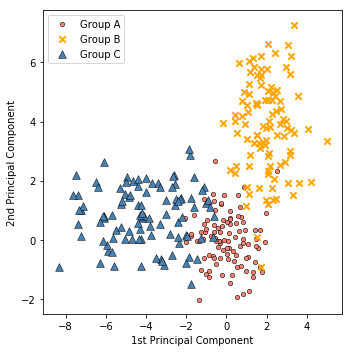

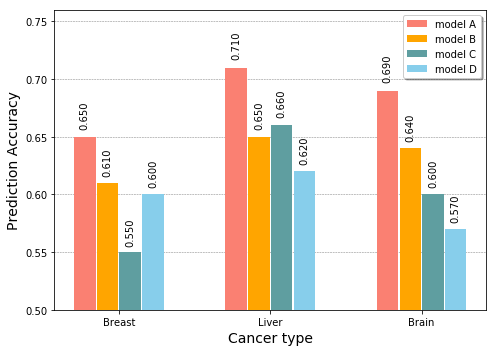

In [2]:
if __name__=='__main__': 
        #### 1. scatter plot으로 나타낼 데이터 분포 설정 
        labels = ['Group A', 'Group B', 'Group C'] 
        means = [(0,0), (2,4), (-4,1)] 
        covs = [[[1,0],[0,1]], # cov of A 
                [[1,0],[0,3]], # cov of B 
                [[3,0],[0,1]]] # cov of C 
        
        ''' NOTE: 그룹별로 2차원 정규분포로부터 100개의 샘플을 추출 ''' 
        data = {'Group A':np.random.multivariate_normal(means[0],covs[0],100), 
                'Group B':np.random.multivariate_normal(means[1],covs[1],100), 
                'Group C':np.random.multivariate_normal(means[2],covs[2],100)} 
        
        #### 2. matplotlib의 figure 및 axis 설정 
        fig, ax = plt.subplots(1,1,figsize=(5,5)) 
        colors = ['salmon', 'orange', 'steelblue'] 
        markers = ['o', 'x', '^'] 
        sizes = [20,40,60] 
        widths = [0.5, 2, 0.5] 
        
        #### 3. scatter plot 그리기 
        for i, label in enumerate(labels): 
            X = data[label][:,0] 
            Y = data[label][:,1] 
            ax.scatter(X, Y, marker=markers[i], color=colors[i], label=label, 
                       s=sizes[i], edgecolor='k', linewidth=widths[i]) 
            
            #### 4. Axis 세부설정 
        ax.set_xlabel('1st Principal Component') 
        ax.set_ylabel('2nd Principal Component') 
        
        #### 5. 범례 나타내기 
        ax.legend(loc='best') 
        
        #### 6. 그래프 저장하고 출력하기 
        plt.tight_layout() 
        plt.savefig('ex_scatterplot.png', format='png', dpi=300) 
        plt.show()

        
        
        
def main(): 
    #### 1. bar plot으로 나타낼 데이터 입력 
    models = ['model A', 'model B', 'model C', 'model D'] 
    xticks = ['Breast', 'Liver', 'Brain'] 
    data = {'model A':[0.65, 0.71, 0.69], 
            'model B':[0.61, 0.65, 0.64], 
            'model C':[0.55, 0.66, 0.60], 
            'model D':[0.60, 0.62, 0.57]} 
    
    #### 2. matplotlib의 figure 및 axis 설정 
    fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정 
    colors = ['salmon', 'orange', 'cadetblue', 'skyblue'] 
    width = 0.15 
    
    #### 3. bar 그리기 
    for i, model in enumerate(models): 
        pos = compute_pos(xticks, width, i, models) 
        bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i]) 
        present_height(ax, bar) # bar높이 출력 
        
    #### 4. x축 세부설정 
    ax.set_xticks(range(len(xticks))) 
    ax.set_xticklabels(xticks, fontsize=10)	
    ax.set_xlabel('Cancer type', fontsize=14) 
    
    #### 5. y축 세부설정 
    ax.set_ylim([0.5,0.76]) 
    ax.set_yticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75]) 
    ax.yaxis.set_tick_params(labelsize=10) 
    ax.set_ylabel('Prediction Accuracy', fontsize=14) 
    
    #### 6. 범례 나타내기 
    ax.legend(loc='upper right', shadow=True, ncol=1) 
    
    #### 7. 보조선(눈금선) 나타내기 
    ax.set_axisbelow(True) 
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5) 
    
    #### 8. 그래프 저장하고 출력하기 
    plt.tight_layout() 
    plt.savefig('ex_barplot.png', format='png', dpi=300) 
    plt.show() 
    
def compute_pos(xticks, width, i, models): 
    index = np.arange(len(xticks)) 
    n = len(models) 
    correction = i-0.5*(n-1) 
    return index + width*correction 

def present_height(ax, bar): 
    for rect in bar: 
        height = rect.get_height() 
        posx = rect.get_x()+rect.get_width()*0.5 
        posy = height*1.01 
        ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom') 
        
if __name__=='__main__': 
    main()


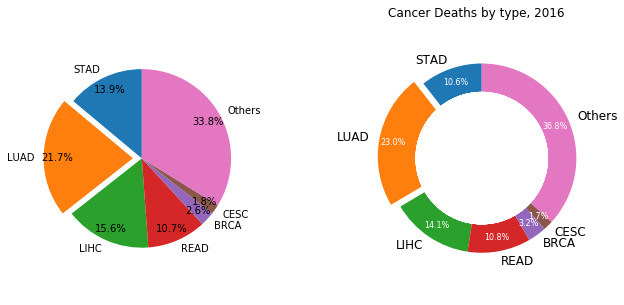

In [3]:
from matplotlib import rcParams

if __name__=='__main__': 
    #### 1. pie plot으로 나타낼 데이터 입력 
    ''' Reference 암 발생 및 사망 현황 : 지표상세화면 - e-나라지표 
    http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxMainPrint.do?idx_cd=2770&board_cd=INDX_001 ''' 
    
    labels = ['STAD', 'LUAD', 'LIHC', 'READ', 'BRCA', 'CESC', 'Others'] 
    titles = ['Cancer Deaths by type, 2010', 'Cancer Deaths by type, 2016'] 
    data = [[10032, 15623, 11205, 7701, 1868, 1272, 24345], # 2010 
            [ 8264, 17963, 11001, 8432, 2472, 1300, 28762]] # 2016 
    
    #### 2. matplotlib의 figure 및 axis 설정 
    rcParams.update({'font.size': 10}) 
    fig, axes = plt.subplots(1,2,figsize=(10,5)) 
    plt.subplots_adjust(wspace=0.5) # subplot간의 너비 간격 조절 
    
    #### 3. 각 subplot에 pie plot 그리기 
    explode = (0, 0.1, 0, 0, 0, 0, 0) # 퍼짐 정도 조절 
    for i in range(2): 
        ax = axes[i] # subplot 선택 
        wedges, texts, autotexts = ax.pie(data[i], explode=explode, labels=labels, 
                                          autopct='%1.1f%%', pctdistance=0.85, shadow=False, startangle=90) 
    for w in wedges: # 조각 설정 
        w.set_linewidth(0) 
        w.set_edgecolor('w') 
    
    for t in texts: # label 설정 
        t.set_color('k') 
        t.set_fontsize(12) 
        
    for a in autotexts: # 퍼센티지 설정 
        a.set_color('w') 
        a.set_fontsize(8) 
        ''' NOTE. 아래의 2줄은 파이차트를 도넛차트로 보이게끔 하는 trick임 ''' 
        centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0) 
        ax.add_artist(centre_circle) 
        ax.set_title(titles[i]) 
        ax.axis('equal') 
        
    #### 4. 그래프 저장하고 출력하기 
    plt.savefig('ex_pieplot.png', format='png', dpi=300) 
    plt.show()


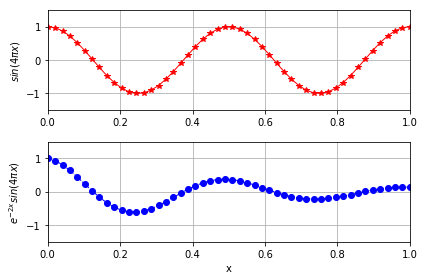

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,50)

y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

plt.subplot(2,1,1)
plt.plot(x,y1,'r-*',lw=1)
plt.grid(True)
plt.ylabel(r'$sin(4 \pi x)$')
plt.axis([0,1,-1.5,1.5])


plt.subplot(2,1,2)
plt.plot(x,y2,'b--o',lw=1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$ e^{-2x} sin(4\pi x) $')
plt.axis([0,1,-1.5,1.5]) 

plt.tight_layout() 
plt.show()